In [64]:
#import libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing. image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [65]:
#fetch images count from folder
count = 0
dirs = os.listdir('images/')
for dir in dirs:
    files = list(os.listdir('images/'+dir))
    print(dir +' Folder has '+ str(len(files)) + ' images')
    count = count + len(files)
    print('Images folder has '+ str(count) + ' Images')
    

daisy Folder has 764 images
Images folder has 764 Images
dandelion Folder has 1052 images
Images folder has 1816 Images
rose Folder has 784 images
Images folder has 2600 Images
sunflower Folder has 733 images
Images folder has 3333 Images
tulip Folder has 984 images
Images folder has 4317 Images


In [66]:
#Load images into arrays as dataset
base_dir = 'images/'
img_size = 180
batch = 32

In [67]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir, seed = 123, validation_split = 0.2, subset = 'training', batch_size=batch, image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir, seed = 123, validation_split = 0.2, subset = 'validation', batch_size=batch, image_size=(img_size,img_size))



Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [68]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [69]:
import matplotlib.pyplot as plt

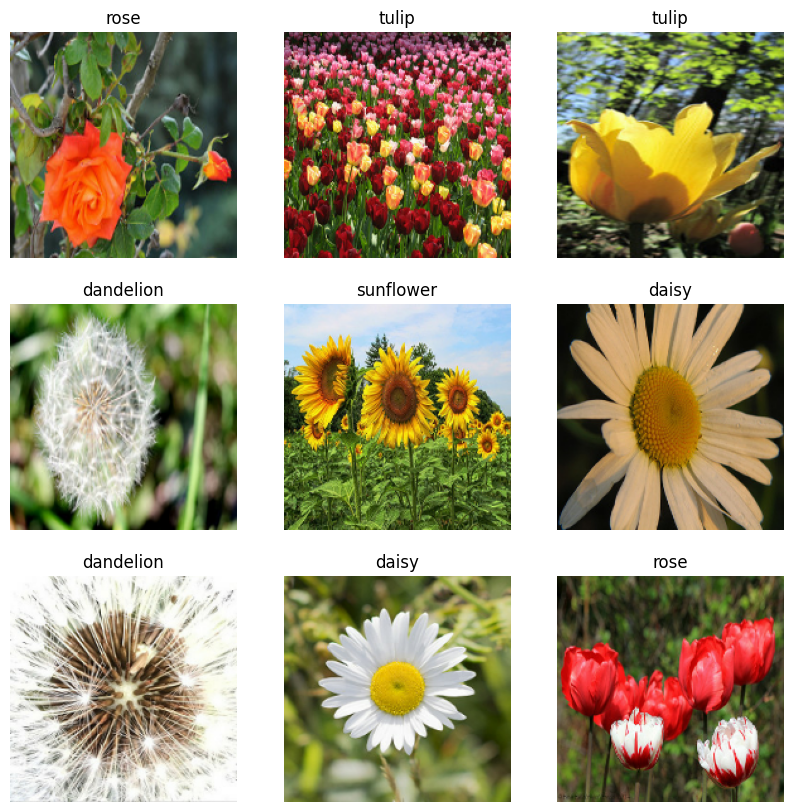

In [70]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [71]:
AUTOTUNE = tf.data.AUTOTUNE

In [72]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [73]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [74]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

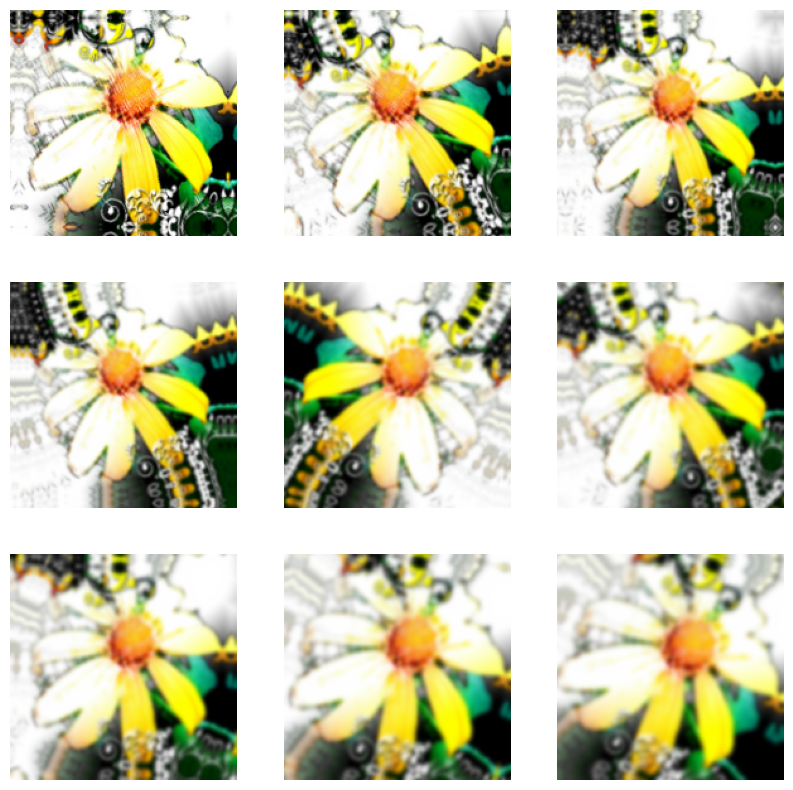

In [75]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [76]:
#model creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [77]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 65s 555ms/step - accuracy: 0.2843 - loss: 1.9093 - val_accuracy: 0.4067 - val_loss: 1.5958
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 511ms/step - accuracy: 0.5266 - loss: 1.1822 - val_accuracy: 0.5886 - val_loss: 1.0603
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 509ms/step - accuracy: 0.5761 - loss: 1.0450 - val_accuracy: 0.6176 - val_loss: 0.9901
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 56s 516ms/step - accuracy: 0.6161 - loss: 0.9582 - val_accuracy: 0.6327 - val_loss: 0.9460
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 513ms/step - accuracy: 0.6509 - loss: 0.9326 - val_accuracy: 0.6269 - val_loss: 0.9286
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 510ms/step - accuracy: 0.6814 - loss: 0.8358 - val_accuracy: 0.6825 - val_loss: 0.8581
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 510ms/step - accuracy: 0.6757 - loss: 0.8354 - val_accuracy: 0.6779 - val_loss: 0.8424
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 56s 516ms/step - accuracy: 0.7119 - loss: 0

In [88]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belogs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [89]:
classify_images('sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


'The Image belogs to rose with a score of 78.58044'

In [91]:
model.save('flower_reco_model.h5')